In [20]:
import GAS_norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pytorch_forecasting.data.examples import generate_ar_data
import GAS_norm
from importlib import reload
reload(GAS_norm)
from GAS_norm import SD_Normalization_Student, Update_function_Student

In [21]:
#generate ar_data
ar_data = generate_ar_data(seasonality=20.0, timesteps=3000, n_series=1)
ar_data["date"] = pd.Timestamp("2020-01-01") + pd.to_timedelta(ar_data.time_idx, "D")
ar_data = ar_data.astype(dict(series=str))
data = ar_data

#Take an array of data and transform it in a dataframe where the value is the column of interest
#array = np.array([987.9,992.1,998.3,1001,1006.2,1010.3,1012.7,1015.8,1014.4,1010.2,1012.3,1012.6,1015.3,1015,1018,1015.9,1017.6,1020.9,1029.1,1036.5,1041.5,1040.3,1044,1048,1052.6,1060.7,1066.7,1073.1,1079.8,1086.8,1088.2,1094.2,1099.1,1104.4,1112.1,1118,1123.5,1129.5,1137.2,1143.7,1149.1,1156.2,1160.8,1165.1,1166.7,1175.8,1184.3,1193.9,1199.7,1207,1215,1224.7,1232.7,1236.2,1241.8,1247.5,1256.5,1262.8,1271.9,1273.3,1277.3,1286.3,1292.2,1297.9,1304.7,1312.8,1322.1,1331.4,1341.4,1346.7,1352.1,1359,1366.7,1376,1383.6,1387.5,1388.5,1392.3,1402.5,1413,1421.6,1430,1435.3,1441.8,1449.2,1448.3,1451.8,1453.8,1453.2,1455.2,1451.2,1447.5,1451.6,1448.1,1451.6,1458.7,1463.8,1470,1483.9,1486.7,1502.1,1507.5,1515.9,1524.8,1531.8,1537.7,1537.5,1543.5,1546.6,1550.9,1554.5,1557.3,1562,1563.7,1563.3,1569.7,1577.2,1579.6,1588.7,1592.1,1594.7,1597.5,1591.1,1586,1583.8,1580.6,1574.7,1572.1,1569,1564.1,1561.1,1559.4,1555.7,1538.8,1533.4,1528.3,1532.4,1534,1540.1,1551,1559.2,1564.5,1568.4,1574.1,1586.2,1606.5,1624.7,1641.9,1654.3,1661.7,1673.9,1684.3,1697.3,1707.6,1718.5,1728.2,1742,1752.9,1771.7,1779.3,1786.8,1797.8,1817,1834.6,1848.7,1864.7,1872.4,1887.8,1897.7,1893.3,1878.6,1875.7,1883.4,1885.3,1892.5,1864,1856.9,1847.8,1849.5,1847.7,1837,1827.1,1820.3,1814.8,1799.6,1791.4,1787.8,1771.7,1754.7,1751.6,1744.9,1738.2,1732.9,1737.8,1751.9,1764.3,1785.1,1800,1805.7,1813.8,1815.9,1817.5,1820.8,1827.7,1839.8,1861,1875,1890.9,1900.9,1900.5,1905.8,1917.5,1928.5,1943,1959,1972.6,1985,1985.8,1994.1,1999.3,2008.3,2012.9,2017.6,2024.5,2033,2035.7,2036.1,2039,2041,2040.5,2038.2,2035.1,2031.8,2028.5,2021.5,2023.5,2022.6,2015.4,2013.5,2011.8,2002.3,1991,1985.4,1986,1975.1,1970.9,1965.5,1962.8,1954.4,1942,1928.8,1916.4,1900.9,1891.9,1872.4,1856.9,1851,1853.6,1871.1,1876.8,1876,1871.1,1864.3,1851.6,1842.8,1839.4,1847.2,1862.2,1855.3,1845.6,1838.1,1837.6,1832.4,1843.5,1850.9,1865.6,1875.4,1873.8,1886.5,1898.8,1893,1882.5,1878.5,1888.6,1902.1,1905.9,1922.1,1950.8,2001.4,2037.6,2054.2,2053.2,2059.6,2065.9,2068.9,2071.9,2074.9,2082.6,2089.3,2094.2,2094.2,2103.5,2113.9,2121.7,2129.6,2136.1,2135.9,2136.4,2143.6,2149.3,2166.6,2186.2,2206.6,2214.6,2215.5,2220,2229,2244.3,2255.8,2265.1,2272.3,2274.7,2273.2,2275.9,2276.7,2290.7,2321.8,2353.1,2371.4,2381.2,2398.7,2414.7,2425.3,2438.7,2446.8,2462.1,2463.1,2457.5,2454.3,2455.8,2453.9,2444.6,2442,2439.4,2440.7,2447.7,2442.7,2445,2454.7,2470.2,2481.3,2483.5,2490.2,2490.2,2487.1,2480.7,2474.4,2473.1,2477.3,2475.7,2468.4,2460.7,2454.7,2441.9,2434.6,2439.9,2451.7,2469.4,2478,2483.3,2488.7,2496,2483.8,2483.8,2480.6,2483.8,2479.2,2474,2470.9,2463.5,2456.3,2443.3,2440.2,2438,2440.8,2451.4,2464.3,2466.6,2465.3,2464.6,2464.1,2456.1,2448.8,2449.1,2442.3,2440.1,2444.8,2453.1,2447.1,2438.8,2432.8,2422.1,2415.6,2413.9,2416.9,2416.2,2411.3,2406.7,2394.3,2386.1,2380.8,2372.3,2383.4,2385.6,2382,2379.6,2380.8,2374.1,2376.8,2374.9,2375.2,2369.3,2365.8,2365,2366.6,2352.6,2350.5,2339.4,2335,2332.2,2327.9,2322.7,2320.5,2312.7,2308.9,2305.1,2317,2328.7,2337.7,2347.3,2352.8,2354,2355.2,2358.3,2358,2362.5,2371.1,2368.9,2371.9,2375.7,2380.4,2381.9,2380.3,2383.7,2388.3,2395,2399.5,2402.3,2410.1,2418.6,2426,2432,2440.1,2454.9,2458.6,2465.8,2476.7,2486.4,2497.7,2517.9,2533.7,2546.4,2554.9,2563.9,2569.7,2581.9,2604.1,2622.2,2642.8,2655.5,2667.3,2681.1,2683.7,2683.1,2696.1,2709.2,2714.2,2718,2716.3,2725.5,2731.9,2741.8,2750.3,2746.8,2748.8,2783,2770.9,2765.1,2767.2,2783.6,2789.6,2794,2795.5,2814.7,2827.4,2842.7,2874,2905.3,2888.8,2905,2926.7,2945.8,2996.7,2998.7,3025,3056.6,3062.9,3074.3,3072.4,3058.7,3069.7,3082,3098.7,3113.7,3122,3139.7,3162.1,3168.6,3172.5,3174.9,3181,3213.5,3251.7,3268.2,3282.9,3300.1,3274.3,3272.9,3273.8,3264,3254.5,3268.4,3280.5,3297.1,3323.8,3312.7,3316.4,3328.5,3336.2,3333.5,3331.7,3341.4,3346.4,3336.8,3329.4,3326.3,3336.9,3351.9,3347.5,3343.8,3315.3,3327.6,3352.7,3366.2,3367.3,3377.7,3379.9,3381.5,3374.8,3385.2,3387.3,3387.5,3417.5,3457.2,3472.7,3475.1,3488,3482.3,3480.7,3505.4,3497.5,3505.5,3513.8,3549.5,3543.2,3539,3523.2,3527.3,3531.2,3562.5,3580.6,3592.4,3576.8,3547.7,3543.8,3555.9,3584.9,3666,3755.8,3870.4,3899,3898.6,3933.5,3930.9,3952,3923.9,3927.3,3914,3906.1,3906.9,3907.7,3903.4,3883.5,3910,3907.4,3920.4,3947.6,3958.1,3955.1,3972.5,3980.3,3988.9,3988.2,3986.8,3990.4,3998.1,3997.4,4006.5,4016.6,4054,4126.8,4208.3,4210.1,4221.2,4231.4,4247.5,4270.8,4280.4,4291,4307.6,4330.3,4364.4,4395.2,4400.7,4415.4,4430,4462.8,4517.7,4519.9,4494.1,4537.6,4562.3,4576,4588.6,4603.6,4617.7,4638.4,4684.2,4678.9,4693.2,4703.3,4733.2,4741.2,4756.2,4775.7,4791.4,4811.8,4824.9,4839.3,4865.7,4891.4,4939.8,4998.9,5038.6,5029.1,5046,5041.8,5045.9,5060,5082.2,5117.3,5125.7,5158.4,5187.2,5239.6,5278,5291.3,5311.4,5324.9,5337.8,5363.6,5389.9,5406.1,5422.4,5445,5441.2,5448.6,5468.2,5499.7,5519.5,5542.2,5549.5,5571.5,5573.2,5566.5,5587.9,5583.4,5587.7,5572.1,5570.3,5587.7,5591.6,5600.8,5617.6,5623.6,5634,5644.7,5635.7,5643.5,5685.3,5716.7,5713.2,5703.4,5703.6,5734.9,5785.7,5805.4,5834.3])
#data = pd.DataFrame(array, columns=['value'])
#add a time index
data['time_idx'] = range(len(data))



#normalize data and make prediction

# Assuming data and required functions are correctly defined and imported

# Set prediction length outside the loop
pred_length = 50



# Dictionary to hold results for each setting
results = {}
degrees_of_freedom = [100]
norm_strengths = [0, 0.001, 0.01, 0.1, 0.5]

# Normalize data and make predictions for different settings
for d in degrees_of_freedom:
    results[d] = {}  # Nested dictionary for each degree of freedom
    for strength in norm_strengths:
        norm_strength = [strength, strength]

        mu_list, sigma2_list, y_norm, alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu = SD_Normalization_Student(
            data['value'][:len(data['value']) - pred_length], data['value'][:len(data['value']) - pred_length], mode='predict',
            norm_strength=norm_strength, degrees_freedom=d
        )

        # Initialize lists to store updated mu and sigma2 values
        updated_mu_list = list(mu_list)
        updated_sigma2_list = list(sigma2_list)

        # Perform updates for the prediction length
        for j in range(pred_length):
            index = len(data['value']) - pred_length + j
            mu, sigma2 = Update_function_Student(
                data['value'][index], updated_mu_list[-1], updated_sigma2_list[-1], alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu, norm_strength
            )
            updated_mu_list.append(mu)
            updated_sigma2_list.append(sigma2)

        #Normalize the data with the updated mu and sigma2
        y_pred = (data['value'] - np.array(updated_mu_list)) / np.sqrt(np.array(updated_sigma2_list))

        # Store the results in the dictionary
        results[d][strength] = {
            'mu': np.array(updated_mu_list),
            'sigma2': np.array(updated_sigma2_list),
            'y_pred': y_pred,
            'y_norm': y_norm,
        }

# Optionally, convert results to a DataFrame for easier handling and plotting
# Creating a multi-index DataFrame from the results dictionary
index = pd.MultiIndex.from_product([results.keys(), norm_strengths, ['mu', 'sigma2', 'y_pred', 'y_norm']],
                                   names=['degrees_freedom', 'norm_strength', 'parameter'])
all_data = []
for d, strengths in results.items():
    for strength, params in strengths.items():
        for param, values in params.items():
            all_data.append(values)

df_results = pd.DataFrame(data=all_data, index=index)




Optimal parameters:  alpha_mu = 0.9999498653967538,  alpha_sigma = 0.9999498653967538, beta_mu = 4.257830489491051e-05, beta_sigma = 8.055481555663523e-05, omega_mu = 0.7322199173962112, omega_sigma = 0.6253255391349551, mu_0 = 0.7322569498321746, sigma2_0 = 0.6253690611134126
Optimal parameters:  alpha_mu = 0.9978356693540507,  alpha_sigma = 0.9978356693540507, beta_mu = 0.0014230111066568236, beta_sigma = 0.0010917560043241278, omega_mu = 0.7302135392695311, omega_sigma = 0.6159586711814842, mu_0 = 0.7304847301611914, sigma2_0 = 0.6171537623031984
Optimal parameters:  alpha_mu = 0.9999426703478153,  alpha_sigma = 0.9999426697957052, beta_mu = 0.9977845044879323, beta_sigma = 0.9537747276041909, omega_mu = 0.0021667680482322467, omega_sigma = 0.011899534990382626, mu_0 = 0.17056412598023624, sigma2_0 = 1.091543722325884e-05
Optimal parameters:  alpha_mu = 0.9999338930386481,  alpha_sigma = 0.9999340859533695, beta_mu = 0.9873048552554353, beta_sigma = 0.9687710294208954, omega_mu = 0.

Degrees of freedom: 100, Normalization strength: 0
Mean: 7.324509134007913e-06
Variance: 0.9799122224451909
5th and 95th quantiles: 0.16   -1.075823
0.84    1.051576
Name: (100, 0.0, y_norm), dtype: float64
Degrees of freedom: 100, Normalization strength: 0.001
Mean: 0.0012645636475488928
Variance: 0.9938026327345086
5th and 95th quantiles: 0.16   -1.082165
0.84    1.060260
Name: (100, 0.001, y_norm), dtype: float64
Degrees of freedom: 100, Normalization strength: 0.01
Mean: -0.018194993969231004
Variance: 1.9036455225618032
5th and 95th quantiles: 0.16   -1.197302
0.84    1.129214
Name: (100, 0.01, y_norm), dtype: float64
Degrees of freedom: 100, Normalization strength: 0.1
Mean: 0.13033982801745736
Variance: 1.0462277314676909
5th and 95th quantiles: 0.16   -1.064096
0.84    1.234086
Name: (100, 0.1, y_norm), dtype: float64
Degrees of freedom: 100, Normalization strength: 0.5
Mean: 0.09911243393537446
Variance: 1.076668639173666
5th and 95th quantiles: 0.16   -0.891032
0.84    1.0859

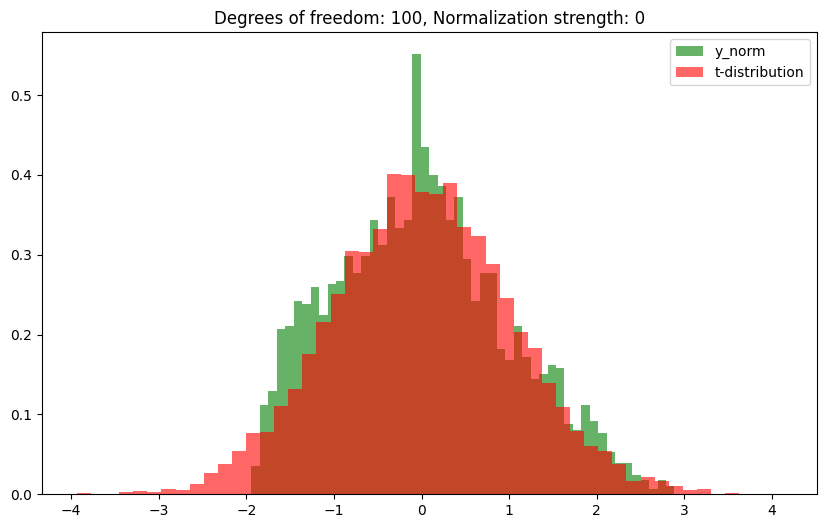

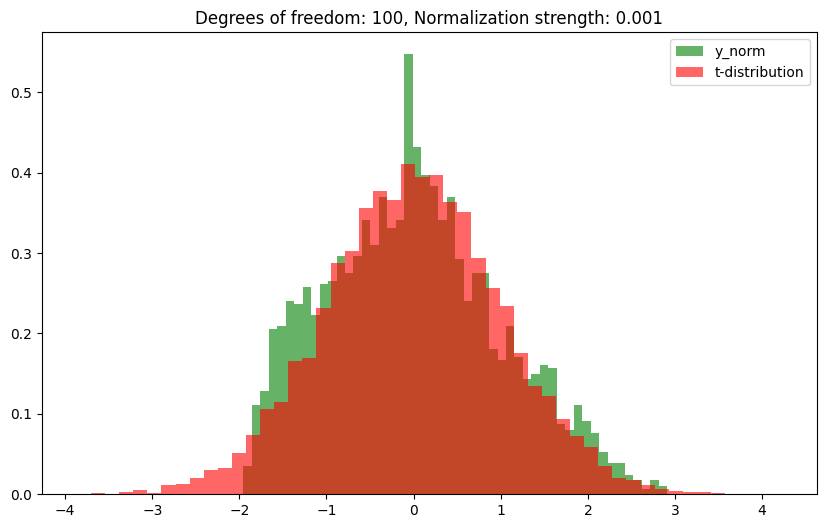

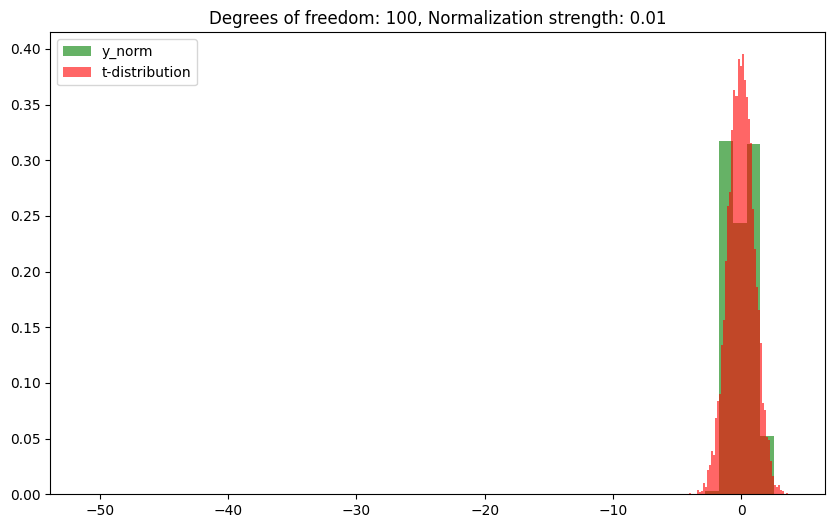

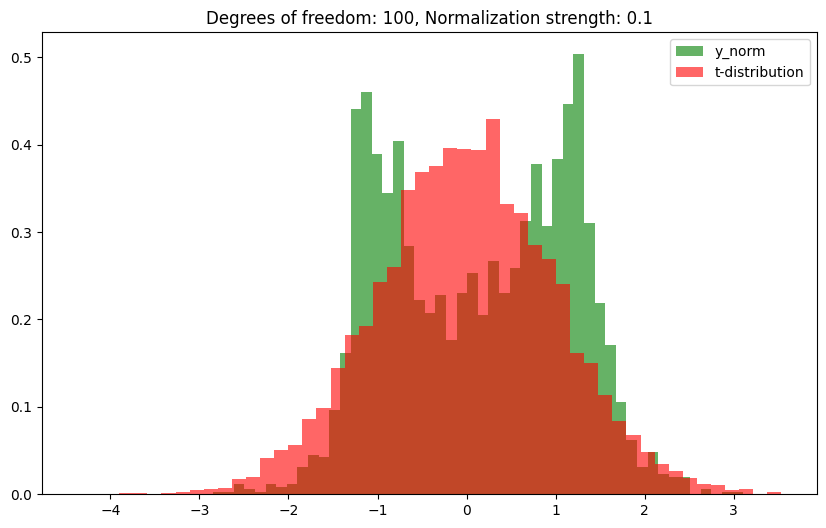

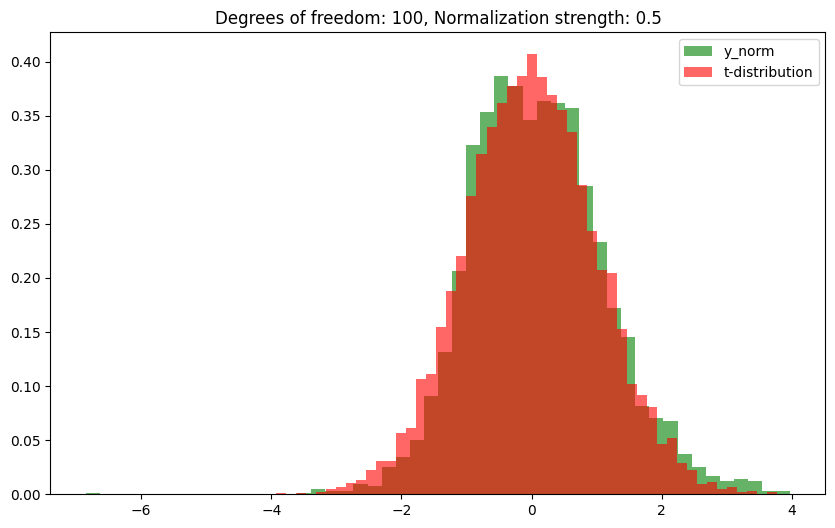

In [30]:
#Plot the density of y_norm comparing it to a t-distribution with the same degrees of freedom
#Write the mean, variance and quantiles of the y_norm

for d in degrees_of_freedom:
    for strength in norm_strengths:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        ax.hist(df_results.loc[(d, strength, 'y_norm')], bins=50, density=True, alpha=0.6, color='g')
        ax.hist(np.random.standard_t(d, size=10000), bins=50, density=True, alpha=0.6, color='r')
        ax.title.set_text(f'Degrees of freedom: {d}, Normalization strength: {strength}')
        ax.legend(['y_norm', 't-distribution'])

        # Calculate mean, variance and quantiles
        mean = np.mean(df_results.loc[(d, strength, 'y_norm')])
        variance = np.var(df_results.loc[(d, strength, 'y_norm')])
        quantiles = quantiles = df_results.loc[(d, strength, 'y_norm')].quantile([0.16, 0.84])
        print(f'Degrees of freedom: {d}, Normalization strength: {strength}')
        print(f'Mean: {mean}')
        print(f'Variance: {variance}')
        print(f'5th and 95th quantiles: {quantiles}')


        

        

plt.show()


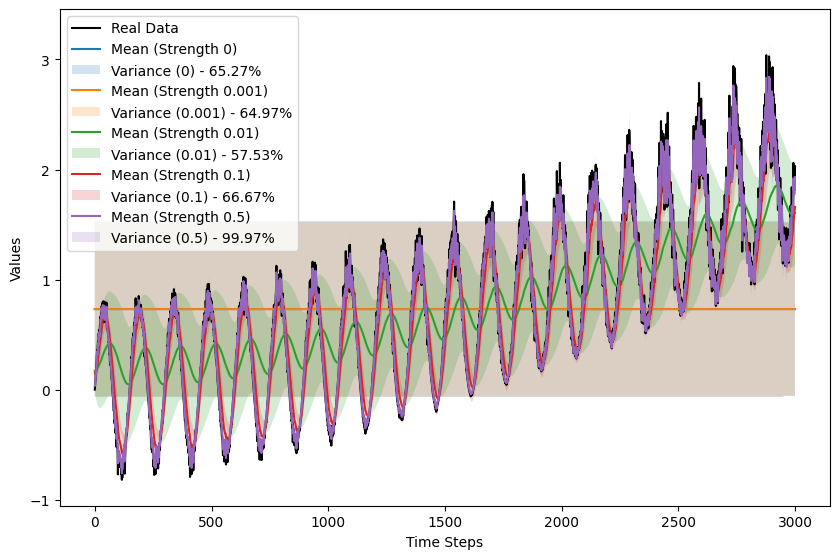

In [23]:
#Add norm_strength to gas_params
gas_params = alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu, norm_strength

import matplotlib.pyplot as plt

# Assuming `results` is your dictionary containing all the data


# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(degrees_of_freedom), figsize=(10, 6), sharex=True)

for idx, d in enumerate(degrees_of_freedom):
    ax = axes
    
    
    # Plot the real data
    ax.plot(data['value'], label='Real Data', color='black')
    
    for strength in norm_strengths:
        res = results[d][strength]
        mu = res['mu']  # Only take the prediction part
        sigma2 = res['sigma2']
        time = range(len(data['value']))  # Assuming test_data length is equal to pred_length

        # Plot the mean
        ax.plot(time, mu, label=f'Mean (Strength {strength})')

        # Plot one standard deviation from the mean
        std_dev = np.sqrt(sigma2)
        within_one_std = np.mean((data['value'] > mu - std_dev) & (data['value'] < mu + std_dev))

        ax.fill_between(time, mu - std_dev, mu + std_dev, alpha=0.2, label=f'Variance ({strength}) - {within_one_std:.2%}')
    
    #Set legend inside the plot 
    ax.legend(loc='upper left')

    

# Set common labels
axes.set_xlabel('Time Steps')
axes.set_ylabel('Values')

plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust layout to make room for legend
plt.show()


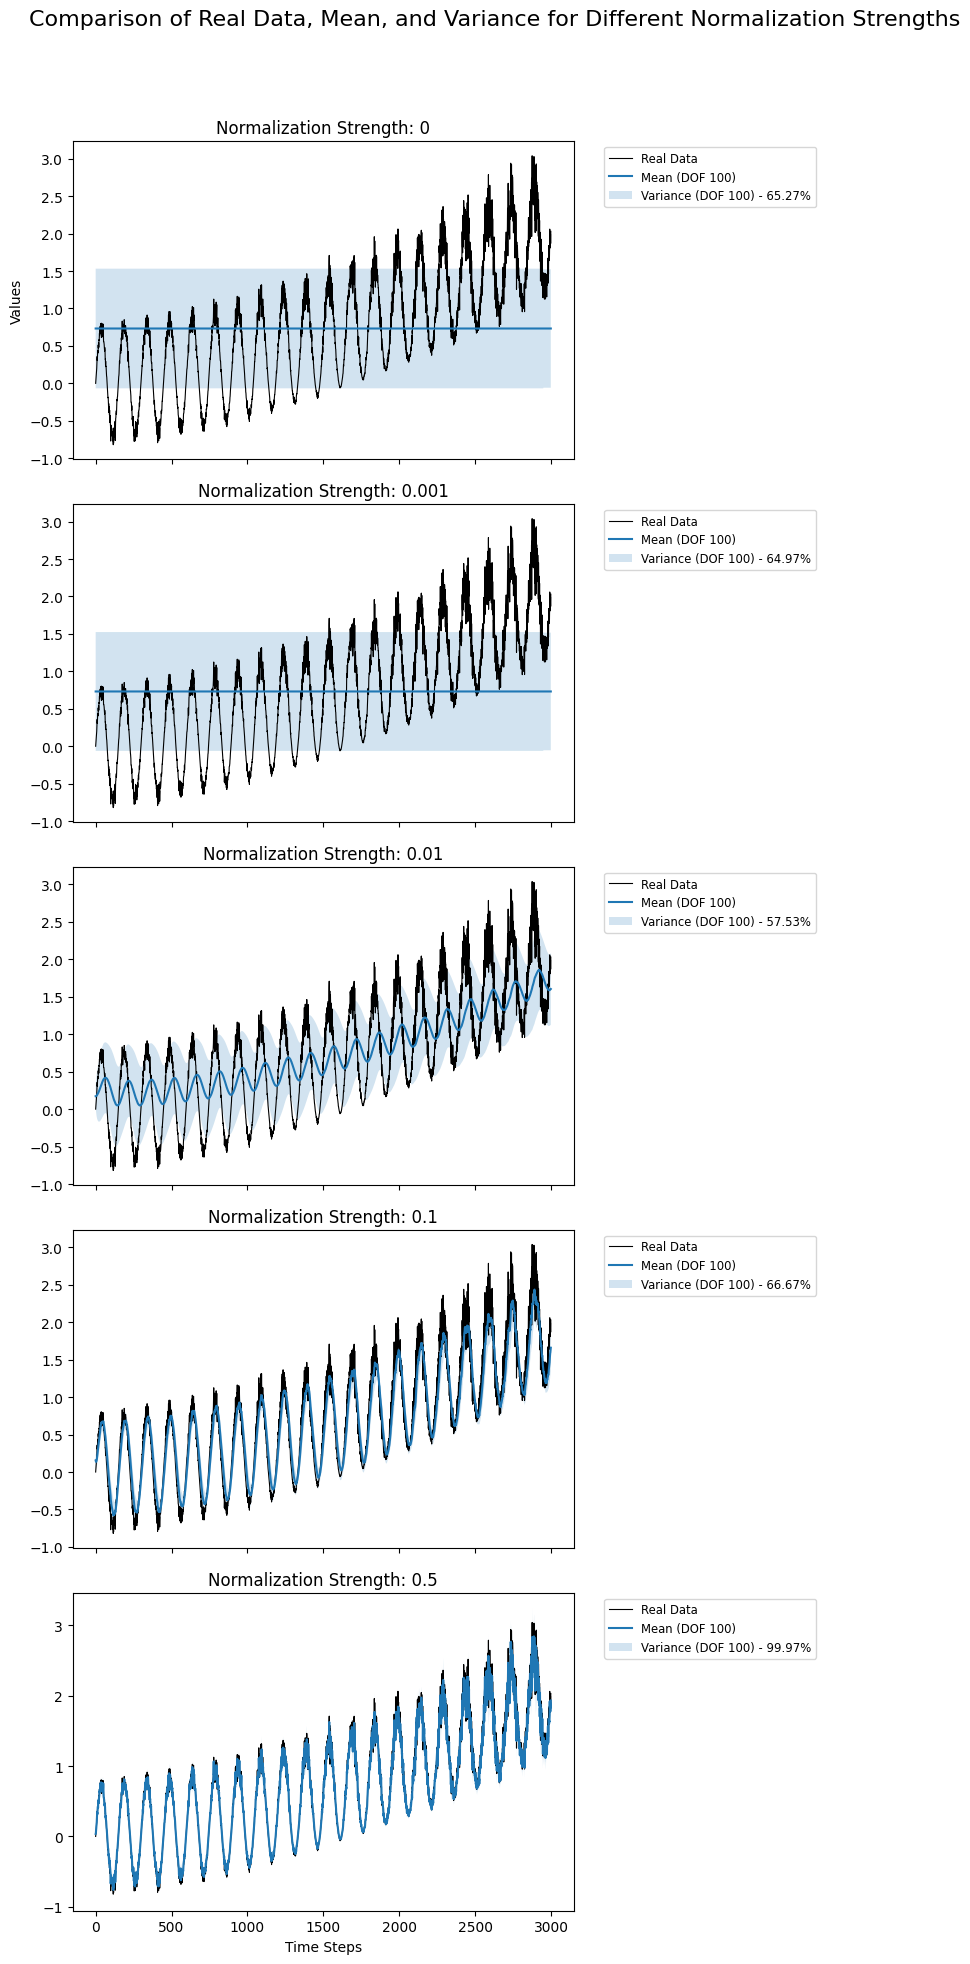

In [24]:
#Do the plot only for 100 degrees of freedom

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(norm_strengths), figsize=(10, 20), sharex=True)
fig.suptitle('Comparison of Real Data, Mean, and Variance for Different Normalization Strengths', fontsize=16)

for idx, strength in enumerate(norm_strengths):
    ax = axes[idx]
    ax.set_title(f'Normalization Strength: {strength}')
    
    # Plot the real data
    ax.plot(data['value'], label='Real Data', color='black', linewidth=0.8)
    
    for d in [100]:
        res = results[d][strength]
        mu = res['mu']  # Only take the prediction part
        sigma2 = res['sigma2']
        time = range(len(data['value']))  # Assuming test_data length is equal to pred_length

        # Plot the mean
        ax.plot(time, mu, label=f'Mean (DOF {d})')

        # Plot one standard deviation from the mean, as label put the percentage of the data that is within one standard deviation of the mean
        std_dev = np.sqrt(sigma2)
        within_one_std = np.mean((data['value'] > mu - std_dev) & (data['value'] < mu + std_dev))
        ax.fill_between(time, mu - std_dev, mu + std_dev, alpha=0.2, label=f'Variance (DOF {d}) - {within_one_std:.2%}')

        
        
        

    # Add legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

# Set common labels
axes[-1].set_xlabel('Time Steps')
axes[0].set_ylabel('Values')

plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust layout to make room for legend
plt.show()

#Print the percentage of the data that is within one standard deviation of the mean

